In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from steepestdescent import steepestdescent
from steepestdescent_line import steepestdescent_line
from newton import newton_md
from newton_line import newton_line_md

In [22]:
def Myfun(x, eval_derivates=True):
    def f(x):
        return (x[1]**2 + x[0] - 1)**2 + (x[0] + 3)**2
    f = f(x)

    if not eval_derivates:
        return f

    else: 
        def df(x):
            return np.array([2 * x[1]**2 + 4 * x[0] + 4, 4 * (x[1]**2 + x[0] - 1) * x[1]])
        df = df(x)

        def d2f(x):
            return np.array([[ 4, 4 * x[1]], [4 * x[1], 12 * x[1]**2 + 4 * x[0] - 4]])
        d2f = d2f(x)
        
        return f, df, d2f

# Contour plot



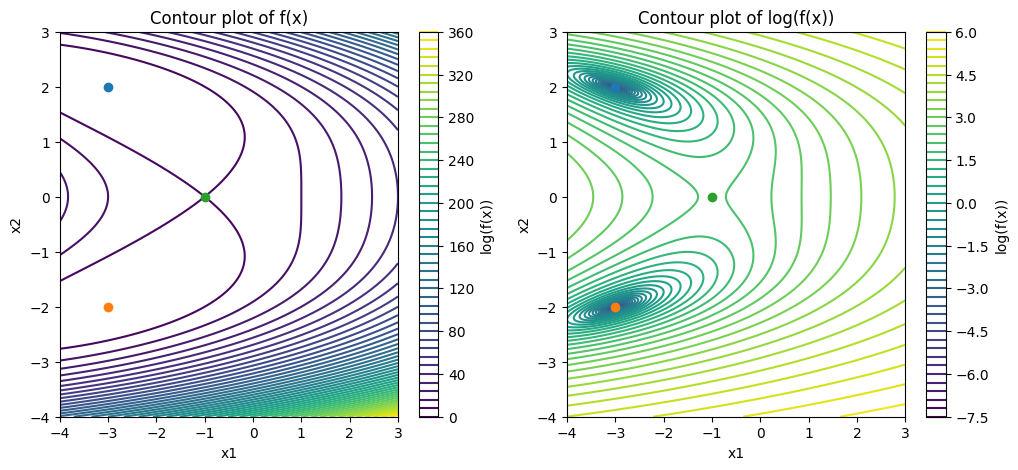

In [24]:
#defining the 3 min points
x_stationary1 = [-3,2]
x_stationary2 = [-3,-2]
x_stationary3 = [-1,0]

x1 = np.linspace(-4, 3, 400)
x2 = np.linspace(-4, 3, 400)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate f(p1, p2) over the meshgrid
f = Myfun([X1,X2],eval_derivates=False)
f_log = np.log(Myfun([X1, X2],eval_derivates=False))

#SubPlots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#Plot
contour_plot1 = axs[0].contour(X1, X2, f, levels=50, cmap='viridis')
fig.colorbar(contour_plot1, ax=axs[0], label='log(f(x))')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Contour plot of f(x)')

contour_plot2 = axs[1].contour(X1, X2, f_log, levels=50, cmap='viridis')
fig.colorbar(contour_plot2, ax=axs[1], label='log(f(x))')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Contour plot of log(f(x))')

axs[0].plot(x_stationary1[0], x_stationary1[1], 'o')  # Minimizer at [-3, 2]
axs[0].plot(x_stationary2[0], x_stationary2[1], 'o')  # Minimizer at [-3, -2]
axs[0].plot(x_stationary3[0], x_stationary3[1], 'o')  # Minimizer at [-1, 0]

axs[1].plot(x_stationary1[0], x_stationary1[1], 'o')  # Minimizer at [-3, 2]
axs[1].plot(x_stationary2[0], x_stationary2[1], 'o')  # Minimizer at [-3, -2]
axs[1].plot(x_stationary3[0], x_stationary3[1], 'o')  # Minimizer at [-1, 0]
plt.show()

# Steepest descent

Initial point: [-2, 1], Iterations: 51, Optimized point: [-3.0, 2.0]
Initial point: [-2, -1], Iterations: 51, Optimized point: [-3.0, -2.0]
Initial point: [-2, 0], Iterations: 1, Optimized point: [-1.0, 0.0]


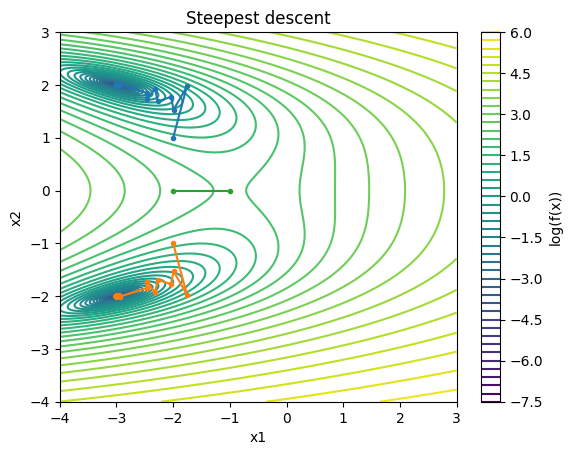

In [27]:
# Defining the 3 initial points
x0_1 = [-2, -1]  # Initial guess 1
x0_2 = [-2, 0]  # Initial guess 2
x0_3 = [-2, 1]  # Initial guess 3
initial_points = [x0_3,x0_1,x0_2]

#Defining the 3 stationary points solved analycally
x_stationaries = [x_stationary1,x_stationary2,x_stationary3]

#Parameters for steepest descent
alpha = 0.1  # Learning rate
maxit = 2000
stop_criteria = 1e-5

#Ploting contour curves
f_log = np.log(Myfun([X1, X2],eval_derivates=False))
plt.contour(X1, X2, f_log, levels=50, cmap='viridis')
plt.colorbar(label='log(f(x))')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Steepest descent')

for x0 in initial_points:
  x_optimized_steepest_line, stats_steepest_line = steepestdescent_line(Myfun, x0, tol=stop_criteria, maxit=maxit)
  iterates = np.array(stats_steepest_line['X'])
  plt.plot(iterates[:, 0], iterates[:, 1],'.-')
  x_optimized_steepest_line = [round(val, 2) for val in x_optimized_steepest_line]
  print(f'Initial point: {x0}, Iterations: {stats_steepest_line["iter"]}, Optimized point: {x_optimized_steepest_line}')